### 1. Visualization

In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Multiclassifier_AD/'

In [4]:
train_audio_path = data_path + 'train/audio/'
filename = '/yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

In [5]:
sample_rate

16000

In [6]:
samples

array([ 14,  -7, -14, ...,  19,  20,  27], dtype=int16)

In [7]:
len(samples)

16000

In [8]:
samples.shape

(16000,)

- sample_rate: 오디오 데이터의 주파수(Hz), 초당 16000개의 샘플이 있다는 것을 의미
- samples: 각 샘플(총 16000개)의 진폭/볼륨

In [9]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
  nperseg = int(round(window_size*sample_rate/1e3))
  noverlap = int(round(step_size*sample_rate/1e3))
  freqs, times, spec = signal.spectrogram(audio, fs=sample_rate, window='hann',
                                          nperseg=nperseg, noverlap=noverlap, detrend=False)
  return freqs, times, np.log(spec.T.astype(np.float32)+eps)

In [10]:
1e3     # 1e3은 1000

1000.0

In [11]:
int(round(20*sample_rate/1e3))    # nperseg: 각 스펙트로그램 세그먼트 길이

320

In [12]:
int(round(10*sample_rate/1e3))    # noverlap: 연속적인 스펙트로그램 세그먼트 간의 겹침

160

- 스펙트로그램이란?; 시간에 따른 주파수 변화 그래프로 y축은 주파수, x축은 시간
- freqs: 주파수, times: 시간, spec: 주파수-시간 영역의 스펙트로그램 데이터

Text(0.5, 0, 'Seconds')

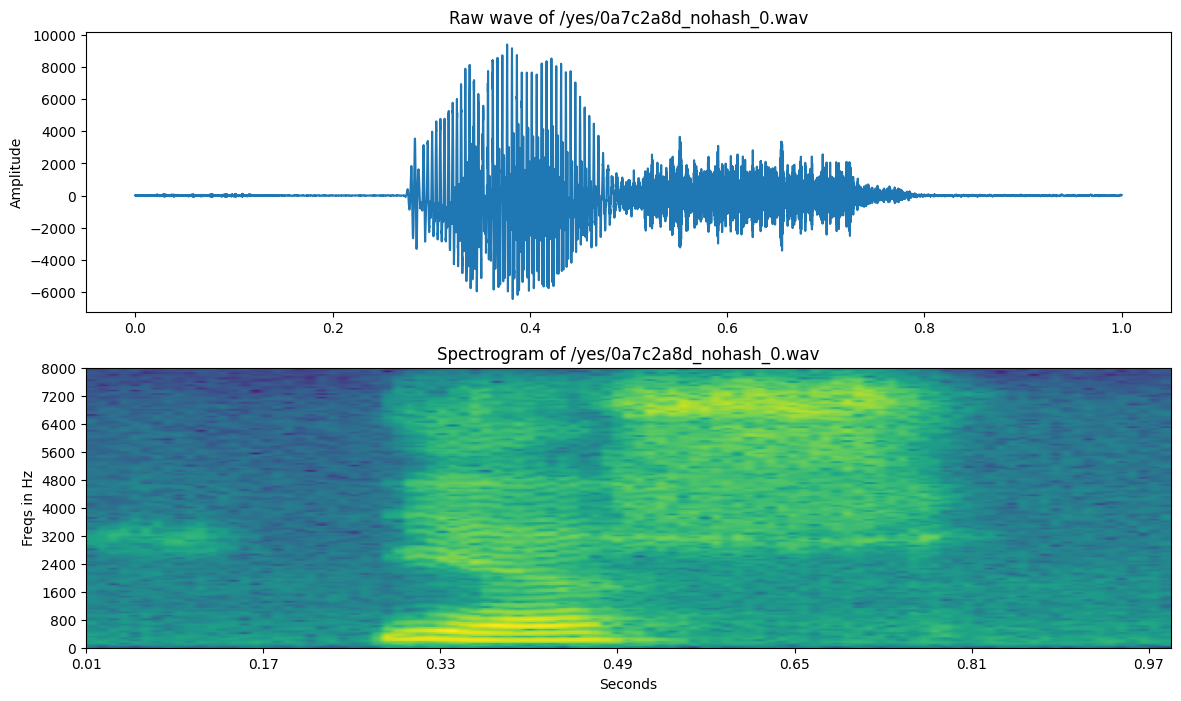

In [13]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)   # 나머지 변수는 이미 지정됨

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(211)   # 2*1의 그리드에서 첫번째 위치를 ax1으로 지정
ax1.set_title('Raw wave of '+ filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)   # 0부터 1까지를 sample_rate를 기준으로 나눈 것이 x축, samples 데이터가 y축

ax2 = fig.add_subplot(212)   # 2*1의 그리드에서 두번째 위치를 ax2으로 지정
ax2.imshow(spectrogram.T, aspect='auto', origin='lower',       # T: transpose
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])    # 16의 간격
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of '+filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

- 각기 다른 주파수 그래프들이 겹쳐서 나옴

In [14]:
spectrogram.shape

(99, 161)

In [15]:
mean = np.mean(spectrogram, axis=0)    # 열을 따라 평균
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [16]:
mean

array([ -6.4454107 ,  -2.6860576 ,  -0.17020428,   1.3436227 ,
         1.6963276 ,   1.5050471 ,   0.12262092,   0.03812655,
        -0.04474266,   0.16225675,  -0.07798804,   0.27368358,
        -0.02601385,   0.24416903,  -0.12742954,  -0.75786954,
        -0.8994832 ,  -0.9487455 ,  -1.1853986 ,  -1.4331721 ,
        -1.7603275 ,  -2.2847564 ,  -2.579999  ,  -3.0245516 ,
        -3.1525595 ,  -3.4786143 ,  -3.6791    ,  -3.639615  ,
        -3.3073633 ,  -3.1152072 ,  -3.1892197 ,  -3.2972746 ,
        -3.1491828 ,  -2.9608018 ,  -2.7185977 ,  -2.5919325 ,
        -2.679514  ,  -2.9472532 ,  -3.1538846 ,  -3.0431159 ,
        -3.167509  ,  -3.4504166 ,  -3.5838594 ,  -3.0295355 ,
        -2.9912786 ,  -3.3625355 ,  -3.250142  ,  -3.5170248 ,
        -3.3700874 ,  -3.234751  ,  -3.0150027 ,  -2.8834755 ,
        -2.8278916 ,  -2.6246634 ,  -2.0025365 ,  -2.0046785 ,
        -1.9853821 ,  -2.0703218 ,  -1.9060241 ,  -1.6847448 ,
        -1.3845016 ,  -1.0857866 ,  -0.89898634,  -0.99

In [17]:
len(mean)

161

In [18]:
spectrogram

array([[-0.10813524, -1.1658479 , -0.6403284 , ..., -0.63350815,
        -1.0452614 , -1.4498404 ],
       [-1.462324  , -1.8992877 , -0.66923594, ..., -0.876201  ,
        -1.0838789 , -0.8919114 ],
       [-0.79810005, -0.53956884, -0.60328144, ..., -0.6394499 ,
        -0.54565734, -0.3789608 ],
       ...,
       [-0.11561721, -2.0975523 , -0.27718157, ..., -1.0335678 ,
        -1.1598047 , -1.0952789 ],
       [-1.5164983 , -1.6941384 , -0.36622715, ..., -0.5698306 ,
        -0.7134216 , -1.0273637 ],
       [-2.2222543 ,  0.16839936, -0.47168943, ..., -0.6487552 ,
        -0.44916213, -0.09730696]], dtype=float32)

In [19]:
spectrogram.shape      # 100*160이어야하는거 아님............?

(99, 161)

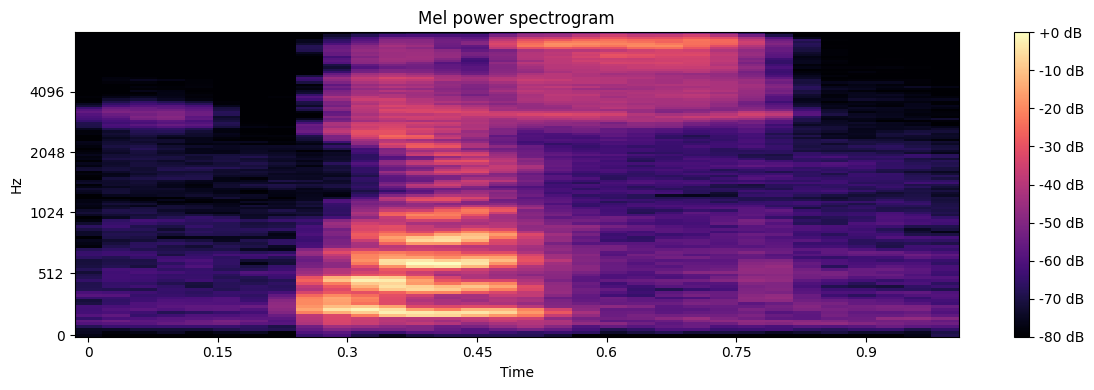

In [20]:
# MFCC
S = librosa.feature.melspectrogram(y=samples.astype(float), sr=sample_rate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)   # Logarithm transformation

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

- Spectrogram에서 사람 가청 주파수만 추출한게 Melspectrogram!
- MFCC: 포먼트라는 feature를 extraction하는 것!

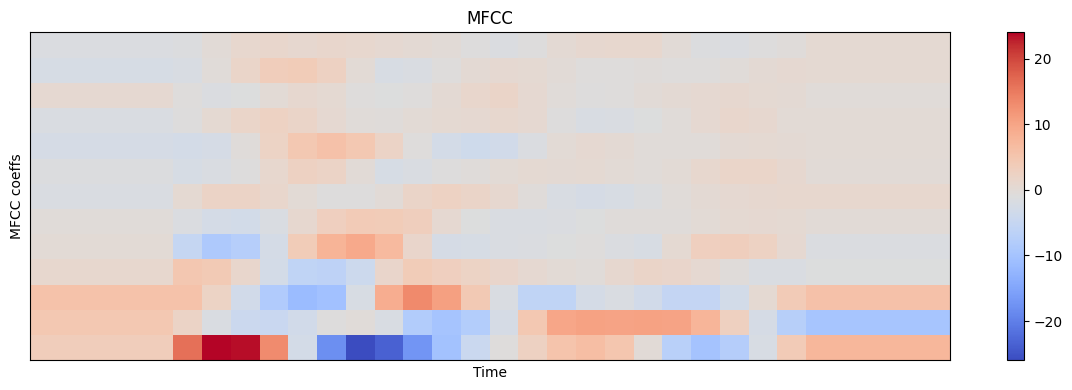

In [21]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

- feature extraction됨!
- spectrogram을 사용할 지, MFCC를 사용할 지는 선택의 문제!

In [22]:
# Spectrogram in 3D
data = go.Surface(z=spectrogram.T)
layout = go.Layout(
    title = 'Spectrogram of "yes" in 3d',
    scene = dict(
        yaxis=dict(title='Frequencies', range=(freqs.min(), freqs.max())),
        xaxis=dict(title='Times', range=(times.min(), times.max())),
        zaxis=dict(title='Log amplitude')
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [23]:
ipd.Audio(samples, rate=sample_rate)     # 앞 뒤로 silence가 긺

In [24]:
samples_cut = samples[4000:13000]     # 소리가 나오는 부분만 cut하면 Reduce dimensionality할 수 있음
ipd.Audio(samples_cut, rate=sample_rate)

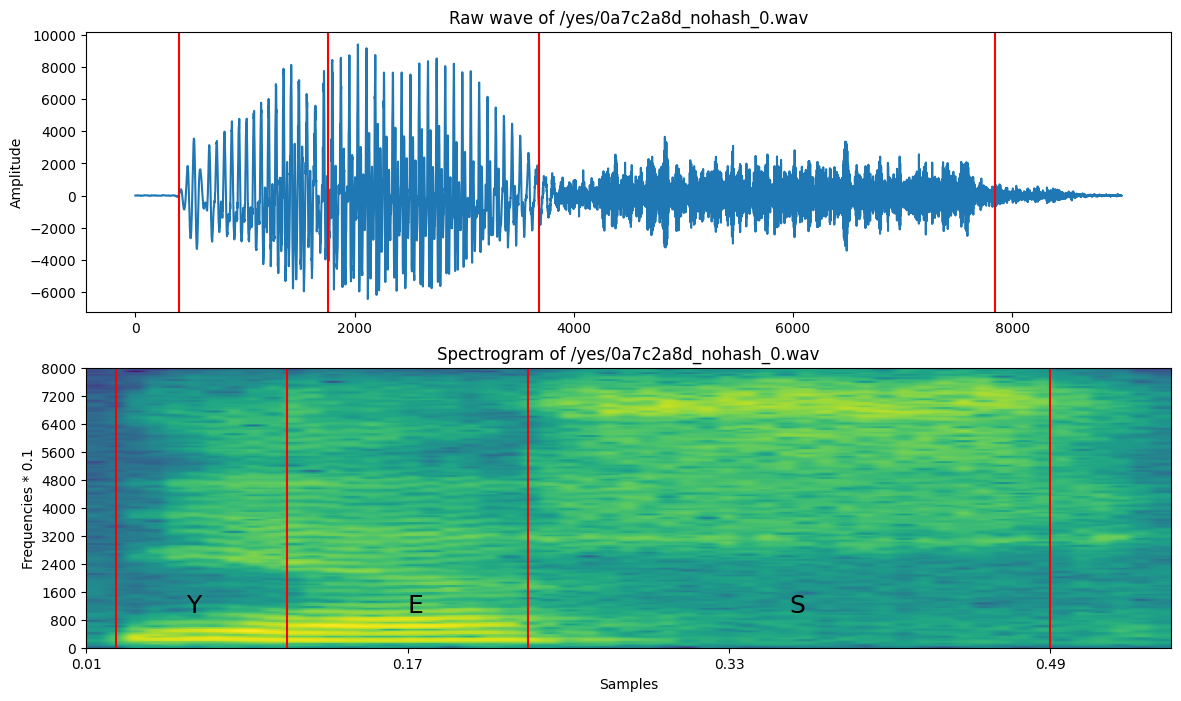

In [25]:
freqs, times, spectrogram_cut = log_specgram(samples_cut, sample_rate)

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(samples_cut)

ax2 = fig.add_subplot(212)
ax2.set_title('Spectrogram of '+filename)
ax2.set_ylabel('Frequencies * 0.1')
ax2.set_xlabel('Samples')
ax2.imshow(spectrogram_cut.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.text(0.06, 1000, 'Y', fontsize=18)
ax2.text(0.17, 1000, 'E', fontsize=18)
ax2.text(0.36, 1000, 'S', fontsize=18)

xcoords = [0.025, 0.11, 0.23, 0.49]
for xc in xcoords:
  ax1.axvline(x=xc*16000, c='r')
  ax2.axvline(x=xc, c='r')

In [26]:
# Resample recordings
def custom_fft(y, fs):     # y가 samples, fs가 sample_rate
  T = 1.0/fs
  N = y.shape[0]
  yf = fft(y)
  xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
  vals = 2.0/N*np.abs(yf[0:N//2])
  return xf, vals

- FFT: Fast Fourier Transform; 시간 영역의 신호를 주파수 영역으로 변환; 시계열 데이터를 주파수 성분으로 분해하는 데 사용

In [27]:
filenmae = '/happy/0b09edd3_nohash_0.wav'
new_sample_rate = 8000

sample_rate, samples = wavfile.read(str(train_audio_path)+filename)
resampled = signal.resample(samples, int(new_sample_rate/sample_rate*samples.shape[0]))  # 두번째 인수: sample 수

In [28]:
ipd.Audio(samples, rate=sample_rate)

In [29]:
ipd.Audio(resampled, rate=new_sample_rate)   # 덜 선명하고 먹먹함

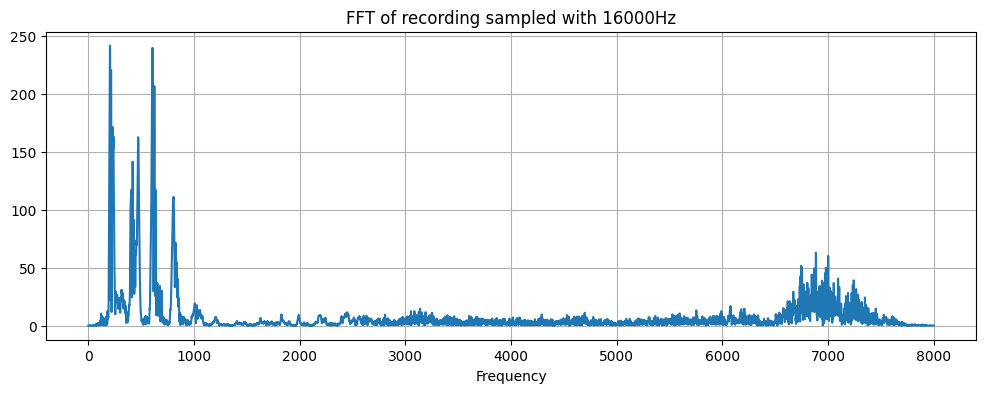

In [30]:
xf, vals = custom_fft(samples, sample_rate)
plt.figure(figsize=(12,4))
plt.title('FFT of recording sampled with ' + str(sample_rate)+'Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

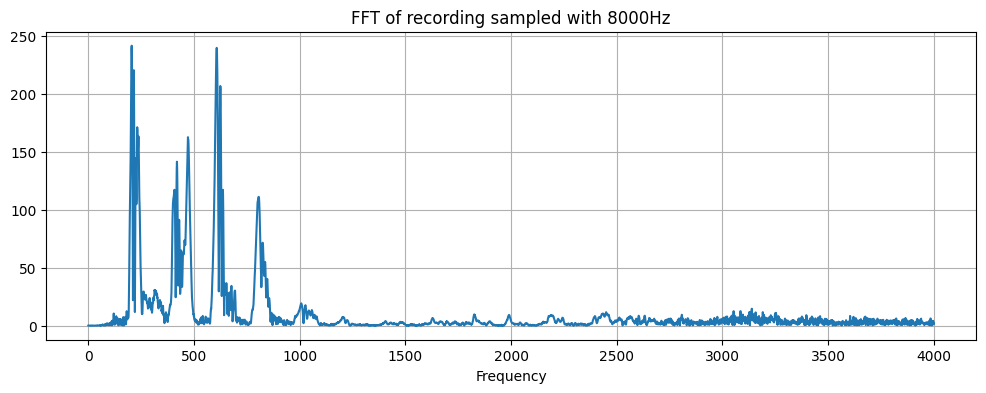

In [31]:
xf, vals = custom_fft(resampled, new_sample_rate)
plt.figure(figsize=(12,4))
plt.title('FFT of recording sampled with ' + str(new_sample_rate)+'Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

- dataset size가 작아짐을 확인할 수 있음!

### 2. Dataset investigation

In [32]:
dirs = [f for f in os.listdir(train_audio_path) if isdir(join(train_audio_path, f))]    # 폴더 이름들 리스트화
dirs.sort()

print(f"Number of labels: {str(len(dirs))}")

Number of labels: 31


In [33]:
dirs

['_background_noise_',
 'bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']

In [35]:
number_of_recordings = []
for direct in dirs:
  waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
  number_of_recordings.append(len(waves))     # 각 폴더별 .wav로 끝나는 파일의 개수를 리스트화

data = [go.Histogram(x=dirs, y=number_of_recordings)]
trace = go.Bar(
    x=dirs,
    y=number_of_recordings,
    marker=dict(color=number_of_recordings)
)
layout = go.Layout(
    title='Number of recordings in given label',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Number of recordings')
)
py.iplot(go.Figure(data=[trace], layout=layout))

- 어차피 다 못 다운 받아서 제대로 안나올거임.......

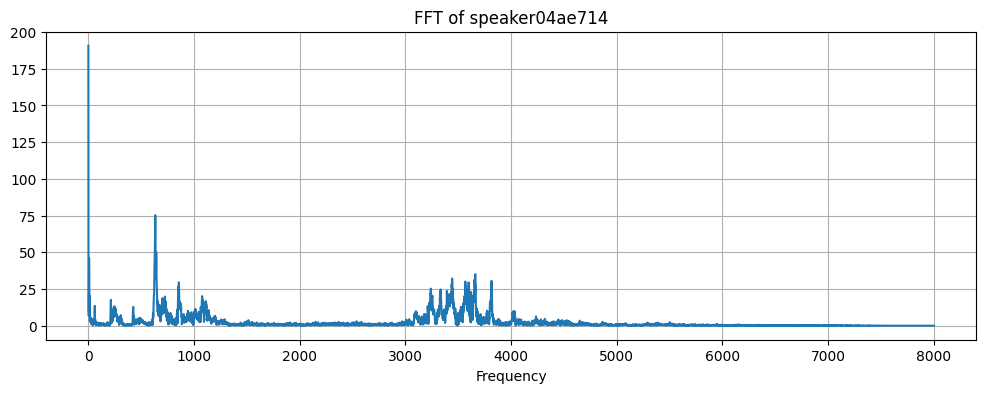

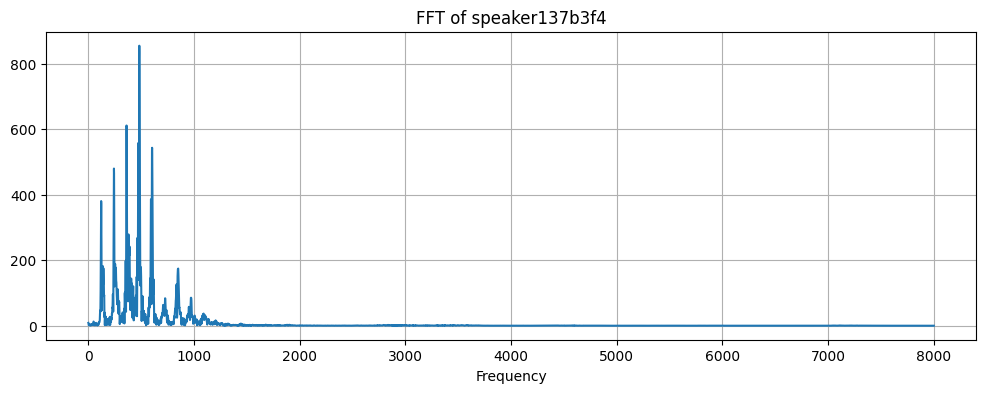

In [34]:
filenames = ['on/004ae714_nohash_0.wav', 'on/0137b3f4_nohash_0.wav']

for filename in filenames:
  sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
  xf, vals = custom_fft(samples, sample_rate)
  plt.figure(figsize=(12,4))
  plt.title('FFT of speaker' + filename[4:11])
  plt.plot(xf, vals)
  plt.xlabel('Frequency')
  plt.grid()
  plt.show()

In [35]:
print(f"Speaker {filenames[0][4:11]}")
ipd.Audio(join(train_audio_path, filenames[0]))

Speaker 04ae714


In [36]:
print(f"Speaker {filenames[1][4:11]}")
ipd.Audio(join(train_audio_path, filenames[1]))

Speaker 137b3f4


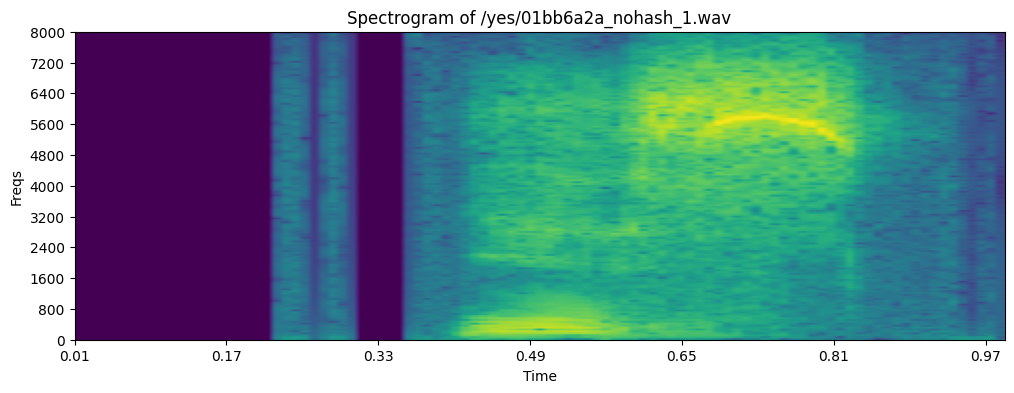

In [37]:
filename = '/yes/01bb6a2a_nohash_1.wav'
sample_rate, samples = wavfile.read(str(train_audio_path)+filename)
freqs, times, spectrogram = log_specgram(samples, sample_rate)

plt.figure(figsize=(12,4))
plt.title('Spectrogram of '+ filename)
plt.ylabel('Freqs')
plt.xlabel('Time')
plt.imshow(spectrogram.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
plt.yticks(freqs[::16])
plt.xticks(times[::16])
plt.show()

In [38]:
ipd.Audio(samples, rate=sample_rate)

- 다른 yes의 spectrogram과 비교했을 때 이상한 형태를 지님 (weird silence, some compression?)

In [41]:
num_of_shorter=0
for direct in dirs:
  waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
  for wav in waves:
    sample_rate, samples = wavfile.read(train_audio_path + direct + '/' + wav)
    if samples.shape[0] < sample_rate:    # 1초보다 짧은 파일
      num_of_shorter += 1
print(f"Number of recordings shorter than 1 second: {str(num_of_shorter)}")

<ipython-input-41-06d7a02b2e16>:5: WavFileWarning:

Chunk (non-data) not understood, skipping it.



Number of recordings shorter than 1 second: 3026


In [39]:
to_keep = 'yes no up down left right on off stop go'.split()
dirs = [d for d in dirs if d in to_keep]
print(to_keep)
print(dirs)

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']


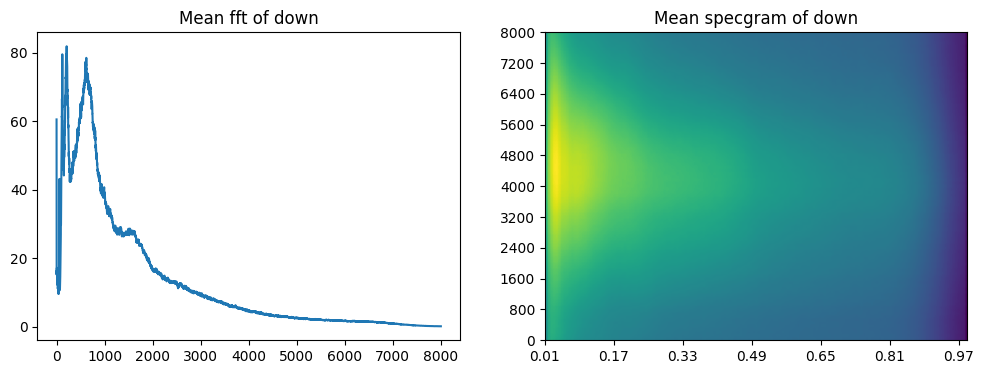

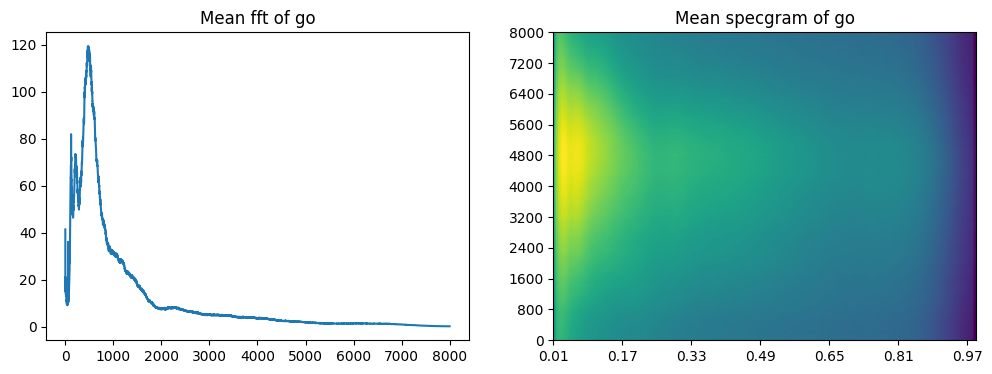

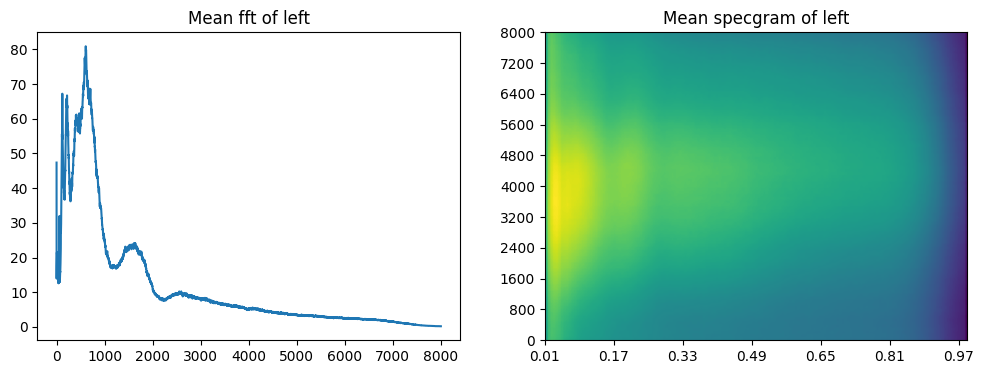

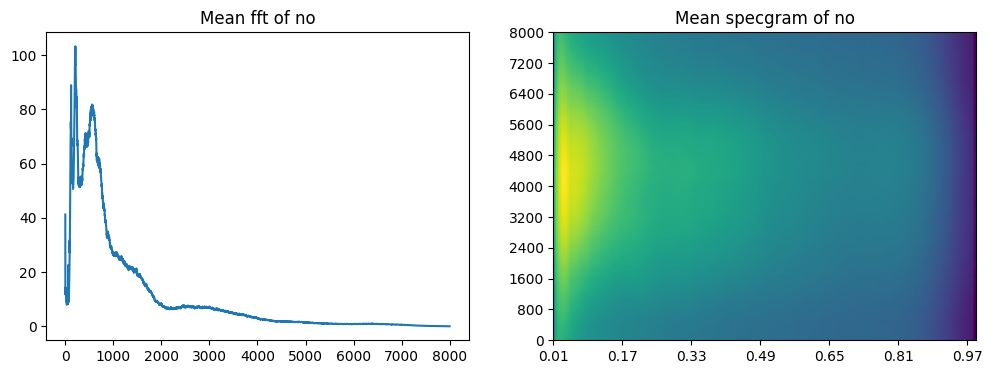

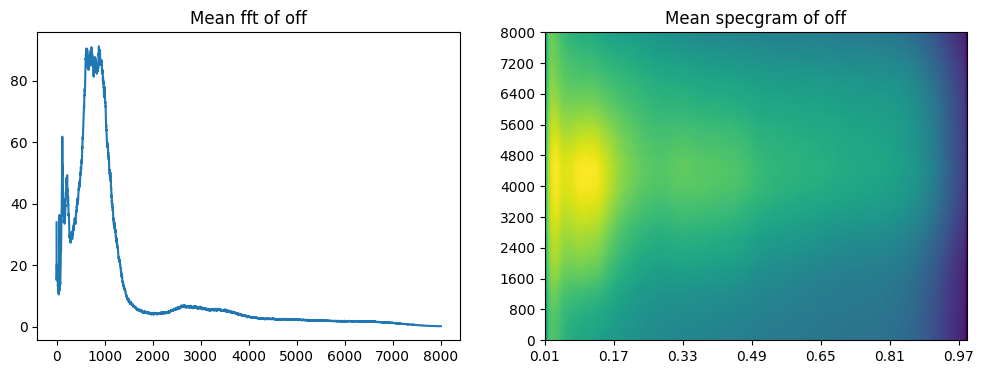

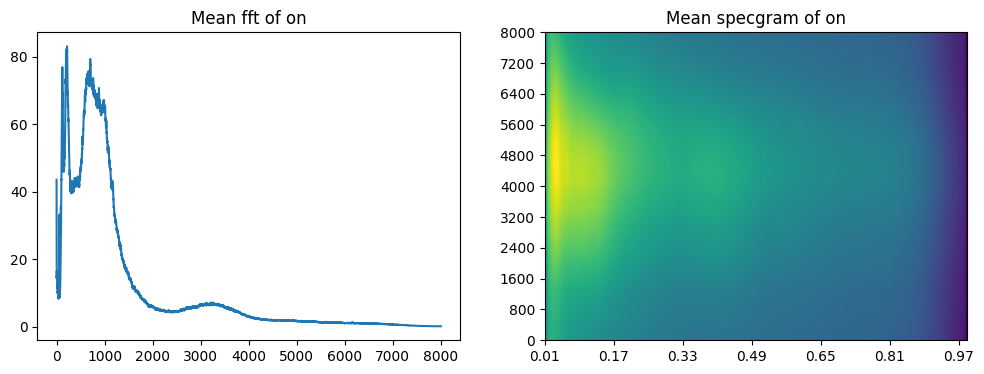

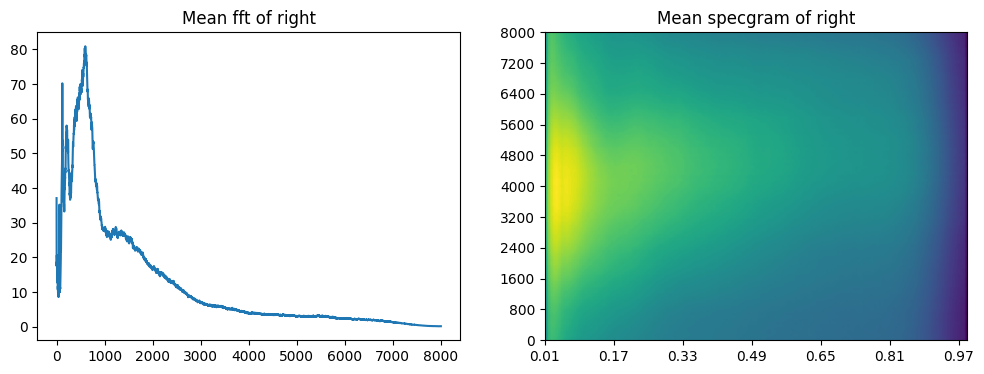

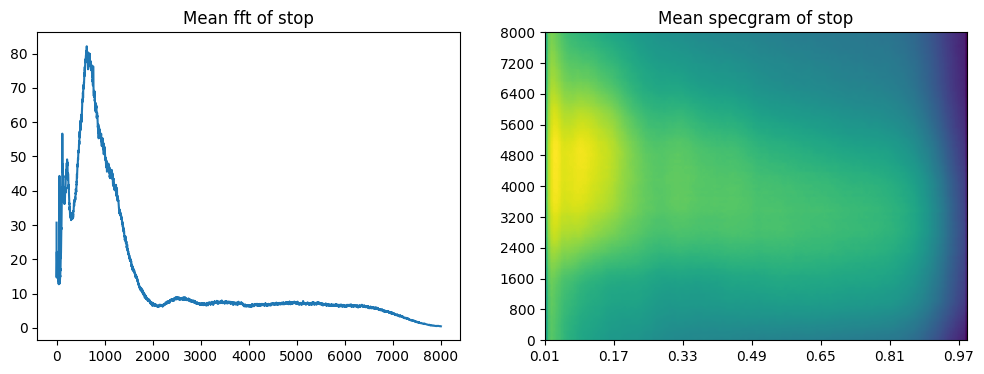

In [ ]:
for direct in dirs:
  vals_all = []
  spec_all = []

  waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
  for wav in waves:
    sample_rate, samples = wavfile.read(train_audio_path+direct+'/'+wav)
    if samples.shape[0] != 16000:
      continue
    xf, vals = custom_fft(samples, 16000)
    vals_all.append(vals)
    freqs, times, spec = log_specgram(samples, 16000)
    spec_all.append(spec)

  fig = plt.figure(figsize=(12,4))

  ax1 = fig.add_subplot(121)
  ax1.set_title('Mean fft of '+direct)
  ax1.plot(np.mean(np.array(vals_all), axis=0))

  ax2 = fig.add_subplot(122)
  ax2.imshow(np.mean(np.array(spec_all), axis=0), aspect='auto', origin='lower',
              extent = [times.min(), times.max(), freqs.min(), freqs.max()])
  ax2.set_yticks(freqs[::16])
  ax2.set_xticks(times[::16])
  ax2.set_title('Mean specgram of '+direct)

  plt.show()

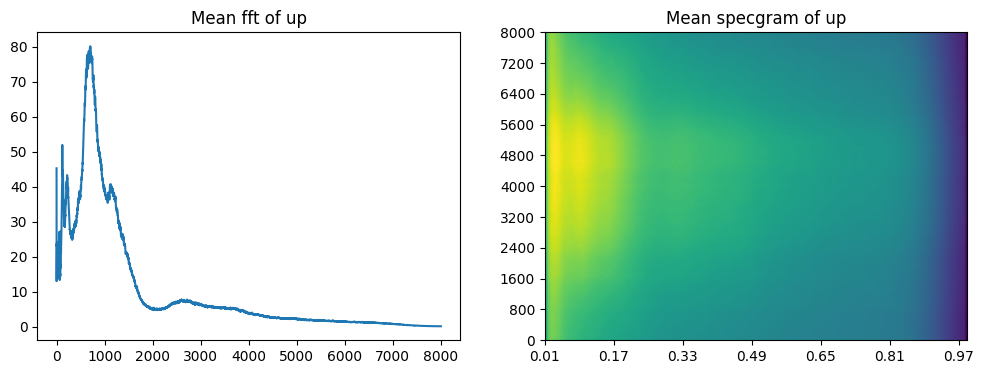

In [54]:
# 런타임 문제로 up, yes 안돼서 따로 진행!
# up
vals_all = []
spec_all = []

waves = [f for f in os.listdir(join(train_audio_path, 'up')) if f.endswith('.wav')]
for wav in waves:
  sample_rate, samples = wavfile.read(train_audio_path+'up'+'/'+wav)
  if samples.shape[0] != 16000:
    continue
  xf, vals = custom_fft(samples, 16000)
  vals_all.append(vals)
  freqs, times, spec = log_specgram(samples, 16000)
  spec_all.append(spec)

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
ax1.set_title('Mean fft of '+'up')
ax1.plot(np.mean(np.array(vals_all), axis=0))

ax2 = fig.add_subplot(122)
ax2.imshow(np.mean(np.array(spec_all), axis=0), aspect='auto', origin='lower',
            extent = [times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Mean specgram of '+'up')

plt.show()

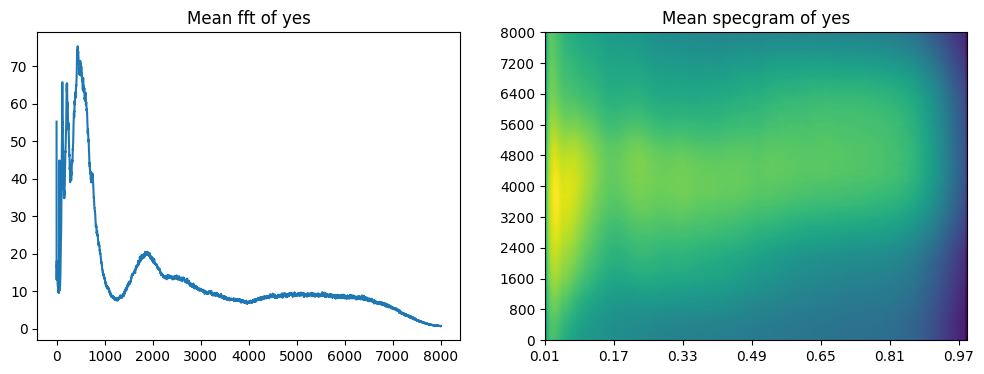

In [55]:
vals_all = []
spec_all = []

waves = [f for f in os.listdir(join(train_audio_path, 'yes')) if f.endswith('.wav')]
for wav in waves:
  sample_rate, samples = wavfile.read(train_audio_path+'yes'+'/'+wav)
  if samples.shape[0] != 16000:
    continue
  xf, vals = custom_fft(samples, 16000)
  vals_all.append(vals)
  freqs, times, spec = log_specgram(samples, 16000)
  spec_all.append(spec)

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
ax1.set_title('Mean fft of '+'yes')
ax1.plot(np.mean(np.array(vals_all), axis=0))

ax2 = fig.add_subplot(122)
ax2.imshow(np.mean(np.array(spec_all), axis=0), aspect='auto', origin='lower',
            extent = [times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Mean specgram of '+'yes')

plt.show()

- mean FFT looks different for every word!

In [56]:
def violinplot_frequency(dirs, freq_ind):     # freq_ind: 주파수(작을수록 reduce dimension)
  spec_all = []
  ind=0
  for direct in dirs:
    spec_all.append([])
    waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
    for wav in waves[:100]:
      sample_rate, samples = wavfile.read(train_audio_path + direct + '/' + wav)
      freqs, times, spec = log_specgram(samples, sample_rate)
      spec_all[ind].extend(spec[:, freq_ind])    # freq_ind 열 추가
      ind += 1
  minimum = min([len(spec) for spec in spec_all])
  spec_all = np.array([spec[:minimum] for spec in spec_all])

  plt.figure(figsize=(13,7))
  plt.title(f"Frequency: {str(freqs[freq_ind])+' Hz'}")
  plt.ylabel('Amount of frequency in a word')
  plt.xlabel('Words')
  sns.violinplot(data=pd.DataFrame(spec_all.T, columns=dirs))
  plt.show()

In [59]:
def violinplot_frequency(dirs, freq_ind):
    spec_all = []
    for direct in dirs:
        waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
        for wav in waves[:100]:
            sample_rate, samples = wavfile.read(join(train_audio_path, direct, wav))
            freqs, times, spec = log_specgram(samples, sample_rate)
            spec_all.append(spec[:, freq_ind])  # spec_all 리스트에 spec의 freq_ind 열을 추가
    minimum = min([len(spec) for spec in spec_all])
    spec_all = np.array([spec[:minimum] for spec in spec_all])

    plt.figure(figsize=(13, 7))
    plt.title(f"Frequency: {str(freqs[freq_ind])+' Hz'}")
    plt.ylabel('Amount of frequency in a word')
    plt.xlabel('Words')
    sns.violinplot(data=pd.DataFrame(spec_all.T, columns=dirs))
    plt.show()

In [61]:
def violinplot_frequency(dirs, freq_ind):
    spec_all = []
    for direct in dirs:
        waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
        for wav in waves[:100]:
            sample_rate, samples = wavfile.read(join(train_audio_path, direct, wav))
            freqs, times, spec = log_specgram(samples, sample_rate)
            spec_all.append(spec[:, freq_ind])  # spec_all 리스트에 spec의 freq_ind 열을 추가
    minimum = min([len(spec) for spec in spec_all])
    spec_all = np.array([spec[:minimum] for spec in spec_all])

    # 모든 데이터를 하나의 배열로 추가
    all_data = np.concatenate(spec_all)

    # DataFrame으로 변환
    df = pd.DataFrame(all_data, columns=['Data'])

    # 바이올린 플롯 그리기
    plt.figure(figsize=(13, 7))
    plt.title(f"Frequency: {str(freqs[freq_ind])+' Hz'}")
    plt.ylabel('Amount of frequency in a word')
    plt.xlabel('Words')
    sns.violinplot(data=df)
    plt.show()

In [65]:
def violinplot_frequency(dirs, freq_ind):
    all_data = []
    labels = []

    for direct in dirs:
        spec_all = []
        waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
        for wav in waves[:100]:
            sample_rate, samples = wavfile.read(join(train_audio_path, direct, wav))
            freqs, times, spec = log_specgram(samples, sample_rate)
            spec_all.append(spec[:, freq_ind])  # spec_all 리스트에 spec의 freq_ind 열을 추가
        minimum = min([len(spec) for spec in spec_all])
        spec_all = np.array([spec[:minimum] for spec in spec_all])
        all_data.append(spec_all)
        labels.append(direct)

    # 데이터와 라벨을 하나로 합침
    all_data = np.concatenate(all_data)
    all_labels = np.concatenate([np.full(len(spec), label) for spec, label in zip(all_data, labels)])

    # DataFrame으로 변환
    df = pd.DataFrame({'Data': all_data.flatten(), 'Label': all_labels})

    # 바이올린 플롯 그리기
    plt.figure(figsize=(13, 7))
    plt.title(f"Frequency: {str(freqs[freq_ind])+' Hz'}")
    plt.ylabel('Amount of frequency in a word')
    plt.xlabel('Words')
    sns.violinplot(x='Label', y='Data', data=df)
    plt.show()

In [66]:
violinplot_frequency(dirs, 20)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 84 and the array at index 1 has size 59

In [ ]:
violinplot_frequency(dirs, 50)

In [ ]:
violinplot_frequency(dirs, 120)

In [68]:
fft_all = []
names = []

for direct in dirs:
  waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
  for wav in waves:
    sample_rate, samples = wavfile.read(train_audio_path+direct+'/'+wav)
    if samples.shape[0] != sample_rate:
      samples=np.append(samples, np.zeros((sample_rate-samples.shape[0], )))  # 같지 않으면 차이만큼 0 넣어주기
    x, val = custom_fft(samples, sample_rate)
    fft_all.append(val)
    names.append(direct+'/'+wav)

fft_all = np.array(fft_all)

fft_all = (fft_all - np.mean(fft_all, axis=0))/np.std(fft_all, axis=0)   # Normalization(Z)

pca = PCA(n_components=3)   # Reduce dimension
fft_all = pca.fit_transform(fft_all)

def interactive_3d_plot(data, names):
  scatt = go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], mode='markers', text=names)
  data = go.Data([scatt])
  layout = go.Layout(title='Anomaly detection')
  figure = go.Figure(data=data, layout=layout)
  py.iplot(figure)

interactive_3d_plot(fft_all, names)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print('Recording go/0487ba9b_nohash_0.wav')
ipd.Audio(join(train_audio_path, 'go/0487ba9b_nohash_0.wav'))

In [ ]:
print('Recording yes/e4b02540_nohash_0.wav')
ipd.Audio(join(train_audio_path, 'yes/e4b02540_nohash_0.wav'))

In [53]:
print('Recording seven/e4b02540_nohash_0.wav')
ipd.Audio(join(train_audio_path, 'seven/b1114e4f_nohash_0.wav'))

Recording seven/e4b02540_nohash_0.wav
